In [37]:
import pandas as pd
import matplotlib.pyplot as plt
#from xgboost import XGBClassifier


%matplotlib inline

In [3]:
df=pd.read_csv('train.csv')

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,4,5,6,7,14,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [5]:
df.shape

(218586, 21)

In [6]:
df.isnull().sum()

session_id                         50705
session_position                   50706
session_length                     50706
track_id_clean                     50706
skip_1                             50706
skip_2                             50706
skip_3                             50706
not_skipped                        50706
context_switch                     50706
no_pause_before_play               50706
short_pause_before_play            50706
long_pause_before_play             50706
hist_user_behavior_n_seekfwd       50706
hist_user_behavior_n_seekback      50706
hist_user_behavior_is_shuffle      50706
hour_of_day                        50706
date                               50706
premium                            50706
context_type                       50706
hist_user_behavior_reason_start    50706
hist_user_behavior_reason_end      50706
dtype: int64

In [7]:
df1=df.dropna()

In [8]:
df1.shape

(167880, 21)

In [9]:
df1.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [10]:
df1.corr()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
session_position,1.000000,0.313508,-0.020918,0.194384,0.027115,0.023199,-0.035673,-0.023678,-0.004032
session_length,0.313508,1.000000,-0.012779,0.053717,-0.007410,-0.020236,-0.008572,-0.016171,-0.013001
context_switch,-0.020918,-0.012779,1.000000,0.003908,0.009697,0.028170,0.025040,0.013602,-0.002287
no_pause_before_play,0.194384,0.053717,0.003908,1.000000,-0.753359,-0.830743,-0.060936,-0.053761,-0.013401
short_pause_before_play,0.027115,-0.007410,0.009697,-0.753359,1.000000,0.906850,0.003859,0.024104,0.014678
long_pause_before_play,0.023199,-0.020236,0.028170,-0.830743,0.906850,1.000000,0.009653,0.034565,0.014715
hist_user_behavior_n_seekfwd,-0.035673,-0.008572,0.025040,-0.060936,0.003859,0.009653,1.000000,0.268304,-0.006167
hist_user_behavior_n_seekback,-0.023678,-0.016171,0.013602,-0.053761,0.024104,0.034565,0.268304,1.000000,-0.001517
hour_of_day,-0.004032,-0.013001,-0.002287,-0.013401,0.014678,0.014715,-0.006167,-0.001517,1.000000


In [11]:
df1.dtypes

session_id                          object
session_position                   float64
session_length                     float64
track_id_clean                      object
skip_1                              object
skip_2                              object
skip_3                              object
not_skipped                         object
context_switch                     float64
no_pause_before_play               float64
short_pause_before_play            float64
long_pause_before_play             float64
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle       object
hour_of_day                        float64
date                                object
premium                             object
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
dtype: object

## Change the data types

In [75]:
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    df1[colname] = df1[colname].astype(int,copy=False)

<ipython-input-75-e3be718dd3c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[colname] = df1[colname].astype(int,copy=False)


In [13]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0.0,0.0,...,0.0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,0,0,1,0.0,1.0,...,0.0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,0,0,1,0.0,1.0,...,0.0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,0,0,1,0.0,1.0,...,0.0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,0,0,1,0.0,1.0,...,0.0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone


In [14]:
df1.dtypes

session_id                          object
session_position                   float64
session_length                     float64
track_id_clean                      object
skip_1                               int32
skip_2                               int32
skip_3                               int32
not_skipped                          int32
context_switch                     float64
no_pause_before_play               float64
short_pause_before_play            float64
long_pause_before_play             float64
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle        int32
hour_of_day                        float64
date                                object
premium                              int32
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
dtype: object

In [15]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium']

In [20]:
for colname in col:
    df1[colname] = df1[colname].astype(object,copy=False)

<ipython-input-20-650d0bf71b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[colname] = df1[colname].astype(object,copy=False)


In [21]:
df1.describe()

,session_position,session_length,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,60.000000,151.000000,23.000000


In [22]:
df1.describe(include=['O'])

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167880,167880,167880,167880,167880,167880,167880.0,167880.0,167880.0,167880.0,167880,167880,167880,167880,167880,167880
unique,10000,50704,2,2,2,2,2.0,2.0,2.0,2.0,2,18,2,6,9,7
top,0_065f296e-4c65-4140-a4e2-bd8444b1f33f,t_bacf06d3-9185-4183-84ea-ff0db51475ce,0,1,1,0,0.0,1.0,0.0,0.0,0,7/15/2018,1,user_collection,fwdbtn,fwdbtn
freq,20,1427,97118,86824,108850,111996,161013.0,128865.0,143263.0,138865.0,116050,119639,136053,67430,79912,81389


In [23]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

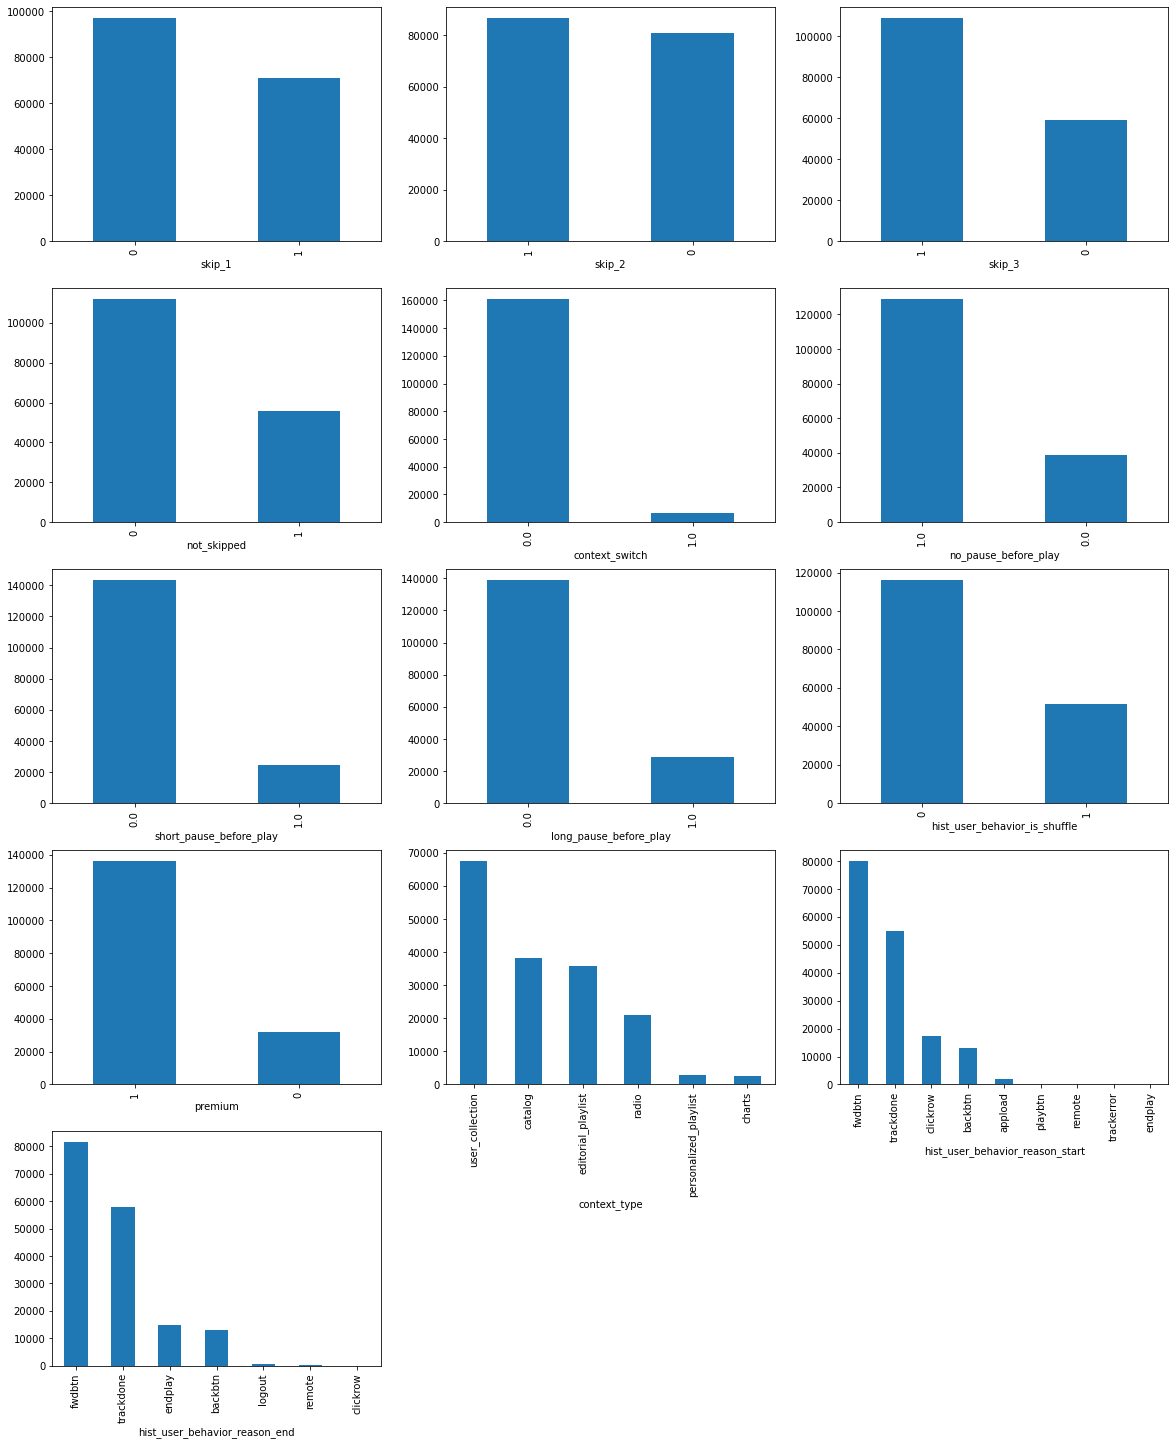

In [27]:
plt.figure(figsize=(20,25))
n = 1

for colname in col:
    plt.subplot(5,3,n)
    df1[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1

## one hot encoding

In [28]:
df_without_session_track = df1.drop(['session_id', 'track_id_clean'], axis=1)

In [29]:
df_without_session_track.shape

(167880, 19)

In [30]:
df_without_session_track = pd.get_dummies(df_without_session_track)

In [31]:
df_without_session_track.shape

(167880, 65)

## correlation
not_skipped_1 means not skip

In [32]:
correlation = df_without_session_track.corr()

In [33]:
correlation['not_skipped_1'].sort_values()

not_skipped_0                             -1.000000
skip_3_1                                  -0.959225
skip_2_1                                  -0.731088
hist_user_behavior_reason_end_fwdbtn      -0.680506
skip_1_1                                  -0.602966
                                             ...   
skip_1_0                                   0.602966
skip_2_0                                   0.731088
skip_3_0                                   0.959225
hist_user_behavior_reason_end_trackdone    0.963551
not_skipped_1                              1.000000
Name: not_skipped_1, Length: 65, dtype: float64

In [38]:
# clf = XGBClassifier(n_estimators=i,
#                         n_jobs=-1, 
#                         random_state=0)
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X2_test)
#     score = clf.score(X_test,y_test)
#     print(i, "n_neighbors",round(score,4))
#     result.append(score)

## import more features about track

In [39]:
df_tf = pd.read_csv('track.csv')

In [41]:
set(df1['track_id_clean'])-set(df_tf['track_id'])

{'t_e81b737b-6efb-4041-b384-f44b99cd4a8a',
 't_d686e279-764e-4ab5-a2fb-33c11f10dfa5',
 't_08e72ad3-96a2-492e-8d49-a53212f0d75a',
 't_952887c4-cda4-4f53-9b78-6684a938cfaa',
 't_f6c6135a-25e1-4ddb-89e2-93e7809b70fd',
 't_6350d279-3b2c-45b7-abae-af1dc73bb28e',
 't_1a48ac84-1c56-40b6-9f4f-499097bc5423',
 't_50840743-2f8e-4936-ba85-38a1692c4686',
 't_327e5d5e-51e7-4fa6-a389-3ac745dad11b',
 't_873bb94e-88c1-4824-b735-5c41b0e0af5a',
 't_522bc1d2-74f5-44b7-99a4-1985dcf0ef56',
 't_94a5f5dd-d5c2-4961-9fb9-f2685b644a0e',
 't_5f68c2b0-5a47-47e4-aa3b-e4b10a44e2dc',
 't_4ff9bddf-5c07-47b5-9672-4dcb988aed91',
 't_fca85fee-5057-4b3d-9b50-7d57e944e43c',
 't_e2b6123b-5be8-4e51-955f-9250fffe43e7',
 't_93afa60a-7f5d-42d1-b34e-c417d104f92d',
 't_b67d2b96-e7d3-4f1e-acbe-5178f211d596',
 't_3452b749-09f8-4693-80f1-a8dc8a5aad71',
 't_3d163af3-1246-439d-89ab-a3596c832fb0',
 't_fbfb5983-fdc4-491e-b22f-d15b060a4f2f',
 't_e5ca3597-406e-48cc-ad63-ece4acef35e5',
 't_d84758db-fe7c-40fe-bc2e-316452e4c317',
 't_effd5c9

In [42]:
set(df_tf['track_id']) - set(df1['track_id_clean'])

{'t_9985a8da-8cdf-400d-aa75-0dff828f57ac',
 't_a7c83982-de09-4747-8ab0-b45c195ad1cc',
 't_78d5ccc7-b69a-424e-b388-f0a3a0dde0d8',
 't_ff8f72f9-8f41-49a5-bde9-662472e53c43',
 't_9324cbd4-9614-411c-9d29-f4bb4ba36afd',
 't_c541f135-675a-41a9-b14e-b99eaf39a6a3',
 't_2bbab9f4-fbe6-4a5d-844c-b0f001817795',
 't_38dfa72c-9470-4125-a970-9d9e944e6b09',
 't_d0af2b01-c4a0-4c00-a396-93c2649a5822',
 't_423bf1fa-2f2a-455b-9792-1421c546d24a',
 't_048dd93e-3b7d-4ec2-a590-a21a3ad7a527',
 't_4b8afd5f-dd19-4a33-a588-0b2800b196ee',
 't_3209df49-10b5-4957-b190-791f343e7c98',
 't_c5bc0ad2-a116-4971-9eb6-8fc652e19e3e',
 't_74906c0f-630c-42b9-8248-1971988424b4',
 't_1c66c6af-bbbe-42b5-8345-ffeea6cb3424',
 't_2e480756-cc0c-420e-8f56-663af53194e3',
 't_038e1631-7010-4492-995b-b6a6a06ecd72',
 't_de3bf19d-c227-4410-9aaa-872dc91b6e1d',
 't_7bb9bdc6-a8a3-40b3-bf94-9f7370df9fb1',
 't_53dba515-89cb-4048-9ad5-5e0798387814',
 't_921bb0a9-3e09-4171-b7e8-ac3e364d5c13',
 't_26888a72-dfa0-4070-aaf9-edf3cdd7d4f2',
 't_6b24470

In [45]:
df1.rename(columns={'track_id_clean':'track_id'}, inplace=True)

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [47]:
df_all = pd.merge(df1, df_tf, on=['track_id'],left_index=True,right_index=False, sort=True)

In [48]:
df_all.shape

(154360, 50)

In [50]:
df_all.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
220419,0_04eb275f-a1ca-4f6c-9296-db886ac0cd94,19.0,20.0,t_00007fba-6bd3-449d-85dd-54d4aea397c2,0,0,0,1,0,0,...,0.571429,0.360884,1.247941,-1.183466,-1.184547,-0.590192,0.941113,0.367843,-0.553446,-0.614133
172617,0_082ccf64-4696-427d-9187-177de8a3bcb0,3.0,20.0,t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8,0,0,1,0,0,1,...,0.571429,0.173189,-0.531965,0.017547,-0.602462,-0.054269,-0.311670,-0.978050,-1.032744,-0.340063
172617,0_082ccf64-4696-427d-9187-177de8a3bcb0,6.0,20.0,t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8,0,1,1,0,0,1,...,0.571429,0.173189,-0.531965,0.017547,-0.602462,-0.054269,-0.311670,-0.978050,-1.032744,-0.340063
172617,0_082ccf64-4696-427d-9187-177de8a3bcb0,10.0,20.0,t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8,1,1,1,0,0,1,...,0.571429,0.173189,-0.531965,0.017547,-0.602462,-0.054269,-0.311670,-0.978050,-1.032744,-0.340063
172617,0_082ccf64-4696-427d-9187-177de8a3bcb0,14.0,20.0,t_0000dc06-0c00-4a09-9dc6-3bdad9c6f0e8,0,0,1,0,0,0,...,0.571429,0.173189,-0.531965,0.017547,-0.602462,-0.054269,-0.311670,-0.978050,-1.032744,-0.340063


In [69]:
df_all.sort_values(axis=0, by=['session_id','session_position'], inplace=True)

In [70]:
df_all.reset_index(drop=True,inplace=True)

In [76]:
df_not_premium =  df1[df1['premium']==0]

In [77]:
df_not_premium.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [78]:
df_not_premium[['session_position','date','hour_of_day','not_skipped']].head(10)

,session_position,date,hour_of_day,not_skipped
141,1.0,7/14/2018,21.0,1
142,2.0,7/14/2018,21.0,1
143,3.0,7/14/2018,21.0,1
144,4.0,7/14/2018,21.0,1
145,5.0,7/14/2018,21.0,1
146,6.0,7/14/2018,22.0,1
147,7.0,7/14/2018,22.0,1
148,8.0,7/14/2018,22.0,1
149,9.0,7/14/2018,22.0,0
150,10.0,7/14/2018,22.0,1


In [79]:
df1.dtypes

session_id                          object
session_position                   float64
session_length                     float64
track_id                            object
skip_1                               int32
skip_2                               int32
skip_3                               int32
not_skipped                          int32
context_switch                      object
no_pause_before_play                object
short_pause_before_play             object
long_pause_before_play              object
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle        int32
hour_of_day                        float64
date                                object
premium                              int32
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
dtype: object

In [80]:
df_not_premium.dtypes

session_id                          object
session_position                   float64
session_length                     float64
track_id                            object
skip_1                               int32
skip_2                               int32
skip_3                               int32
not_skipped                          int32
context_switch                      object
no_pause_before_play                object
short_pause_before_play             object
long_pause_before_play              object
hist_user_behavior_n_seekfwd       float64
hist_user_behavior_n_seekback      float64
hist_user_behavior_is_shuffle        int32
hour_of_day                        float64
date                                object
premium                              int32
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
dtype: object

In [81]:
check_repeat_0 = df_not_premium.groupby(['session_id']).mean()

In [82]:
skip = check_repeat_0['session_length'] - check_repeat_0['session_length']*check_repeat_0['not_skipped'] 
skip[skip > 6]

session_id
0_0009bdeb-b5b7-4073-9b01-b72a32c77cda    18.0
0_000a6cae-aef1-4a3e-b1bd-d1971edfcb41     8.0
0_000cec57-79f9-4acf-87a1-9bb9063d012d     7.0
0_000d307c-cfb4-4a65-9909-7b54d6b39cc8    18.0
0_000d5fd5-923d-451b-be5e-fd5961cff3ea     7.0
                                          ... 
0_0e955c6a-aa47-488f-9a6e-dfb733ac1b5b    18.0
0_0e9abc85-10af-4e6f-b85d-40d2f49fbf22    19.0
0_0e9e752f-99fc-45f0-935c-efeb7563bf9c     9.0
0_0ea14f73-464c-4ef5-86fe-8d6a842a031b     7.0
0_0ea75a3d-9151-444e-a7d2-df2b97d89e05    17.0
Length: 1509, dtype: float64

In [83]:
df_not_premium[df_not_premium['session_id']=='0_0009bdeb-b5b7-4073-9b01-b72a32c77cda'][['session_position','date','hour_of_day','skip_1','skip_2','skip_3','not_skipped','premium']]

,session_position,date,hour_of_day,skip_1,skip_2,skip_3,not_skipped,premium
536,1.0,7/14/2018,21.0,1,1,1,0,0
537,2.0,7/14/2018,21.0,1,1,1,0,0
538,3.0,7/14/2018,21.0,1,1,1,0,0
539,4.0,7/14/2018,21.0,0,0,1,0,0
540,5.0,7/14/2018,21.0,0,1,1,0,0
541,6.0,7/14/2018,21.0,1,1,1,0,0
542,7.0,7/14/2018,21.0,0,0,1,0,0
543,8.0,7/14/2018,21.0,0,0,0,1,0
544,9.0,7/14/2018,21.0,0,0,1,0,0
545,10.0,7/14/2018,21.0,1,1,1,0,0


In [84]:
df1.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,...,0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,0,0,1,0,1,...,0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,0,0,1,0,1,...,0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,0,0,1,0,1,...,0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,0,0,1,0,1,...,0,0.0,0.0,1,16.0,7/15/2018,1,editorial_playlist,trackdone,trackdone
